<a href="https://colab.research.google.com/github/alexis-castellanos/py-hardware-utils/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# generate 20 data points
N = 20

#random data on the x-axis in (-5,+5)
X = np.random.random(N)*10-5

# alist plus some noise
Y = 0.5 * X - 1 + np.random.randn(N)

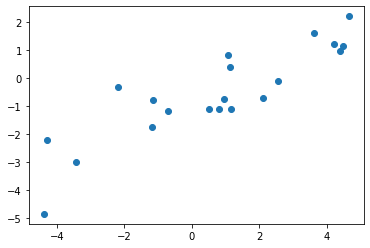

In [ ]:
#plot the data
plt.scatter(X,Y)




In [ ]:
#create the linear regression model
model = nn.Linear(1,1)

In [ ]:
#loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.1)

In [ ]:
#in ml we want our data to be of shape:
# (num_samples x num_dimesions)
X = X.reshape(N,1)
Y = Y.reshape(N,1)

In [ ]:
#PyTorch uses float32 by defau;t
#Numpy uses float64 by default

inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

In [ ]:
type(inputs)

torch.Tensor

In [ ]:
#train the model

n_epochs = 30
losses = []

for it in range(n_epochs):
    #zero the parameters gradients
    optimizer.zero_grad()

    #forward pass
    outputs = model(inputs)
    loss = criterion(outputs,targets)

    #keep the loss so we can plot it later
    losses.append(loss.item())

    #backward and optimize
    loss.backward()
    optimizer.step()

    print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item():4f}')

Epoch 1/30, Loss: 1.133914
Epoch 2/30, Loss: 0.862468
Epoch 3/30, Loss: 0.738565
Epoch 4/30, Loss: 0.682009
Epoch 5/30, Loss: 0.656193
Epoch 6/30, Loss: 0.644409
Epoch 7/30, Loss: 0.639029
Epoch 8/30, Loss: 0.636574
Epoch 9/30, Loss: 0.635453
Epoch 10/30, Loss: 0.634941
Epoch 11/30, Loss: 0.634708
Epoch 12/30, Loss: 0.634601
Epoch 13/30, Loss: 0.634552
Epoch 14/30, Loss: 0.634530
Epoch 15/30, Loss: 0.634520
Epoch 16/30, Loss: 0.634515
Epoch 17/30, Loss: 0.634513
Epoch 18/30, Loss: 0.634512
Epoch 19/30, Loss: 0.634512
Epoch 20/30, Loss: 0.634511
Epoch 21/30, Loss: 0.634511
Epoch 22/30, Loss: 0.634511
Epoch 23/30, Loss: 0.634511
Epoch 24/30, Loss: 0.634511
Epoch 25/30, Loss: 0.634511
Epoch 26/30, Loss: 0.634511
Epoch 27/30, Loss: 0.634511
Epoch 28/30, Loss: 0.634511
Epoch 29/30, Loss: 0.634511
Epoch 30/30, Loss: 0.634511


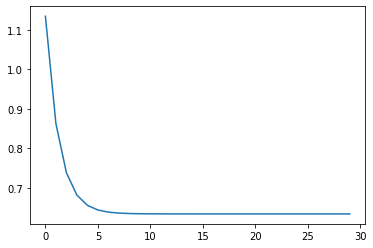

In [ ]:
plt.plot(losses)

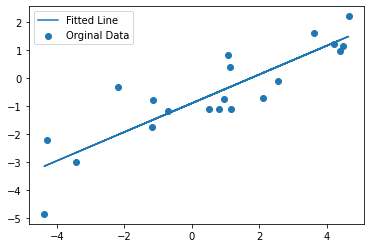

In [ ]:
predicted = model(inputs).detach().numpy()
plt.scatter(X,Y,label = 'Orginal Data')
plt.plot(X,predicted,label='Fitted Line')
plt.legend()
plt.show()

In [ ]:
with torch.no_grad():
  out = model(inputs).numpy()

out

array([[-2.6664188 ],
       [ 1.3934147 ],
       [ 1.478658  ],
       [ 0.17221898],
       [ 0.40307635],
       [-2.019637  ],
       [-1.4907751 ],
       [-0.64522135],
       [-0.34898627],
       [-0.32539332],
       [-1.2654237 ],
       [ 1.3505363 ],
       [-0.4107899 ],
       [-3.107021  ],
       [-3.1495848 ],
       [-0.31036216],
       [ 1.2527003 ],
       [ 0.9607586 ],
       [-0.4855618 ],
       [-1.5140352 ]], dtype=float32)

In [ ]:
#inspect the values vs actual values

w = model.weight.data.numpy()
b = model.bias.data.numpy()

In [ ]:
print(w,b)

[[0.51231414]] [-0.9042955]
